Задание 1.

Ниже расположена реализация аглоритма k-NN для датасета ирисов Фишера. Как и в первой лабораторной, где использовались ирисы, вся выборка была разделена на обучающую и тестовую в соотношении 9:1. На тестовой выборке была проведена кроссвалидация (запущен k-fold с $k=10$) и найдено наилучшее k, а также построен график успешных предсказаний (1 минус средняя ошибка) на кроссвалидации в зависимости от k. Затем при наилучшем k протестировали k-NN на тестовой выборке, в качестве соседей рассматриваем элементы из обучающей выборки.

Задание 2.

Под проклятием размерности понимают ситуацию, когда с ростом размерности пространства экспоненциально растет число требуемых элементов пространства для удовлетворения некоторому условию. К примеру, для получения хороших оценок на true risk в k-NN с ростом размерности $d$ необходим экспоненциальный рост размера выборки $m$. Еще пример: нам надо $100$ точек, чтобы покрыть отрезок $[0,\,1]$ с интервалом $0.01$, и $10^{20}$ точек для $10$-мерного куба со стороной $[0,\,1]$. Бороться с проклятьем можно, уменьшив размерность пространства, например, удалив слабо влияющие на результат классификации признаки.

In [1]:
import math
import numpy as np
from numpy import linalg as LA
import random
import matplotlib.pyplot as plt

In [2]:
def read_data_from_file(filename):
    samples = []
    classes = set()
    with open(filename) as f:
        for line in f:
            line_splitted = line.strip().split(",")
            samples.append(([float(x) for x in line_splitted[:-1]], get_class(line_splitted[-1])))
            classes.add(get_class(line_splitted[-1]))
    return samples, classes

def get_class(class_name):
    if class_name == "Iris-setosa":
        return 1
    if class_name == "Iris-versicolor":
        return 2
    if class_name == "Iris-virginica":
        return 3
    return 4

In [3]:
def predict(samples, to_predict, to_predict_classes, k_knn):
    supposed_classes = [knn(samples, test, k_knn) for test in to_predict]
    actual_classes = to_predict_classes
    
    loss = 0
    for cl in zip(supposed_classes, actual_classes):
        if cl[0] != cl[1]:
            loss += 1
            
    return float(loss) / len(actual_classes)

In [4]:
def knn(samples, test, k):
    distances = sorted([(LA.norm(np.subtract(x[:-1], test)), x[-1]) for x in samples], key=lambda d: d[0])[:k]
    return np.argmax(np.bincount([d[1] for d in distances]))    

In [5]:
def k_fold(samples, k, knn_range):
    block_size = int(math.floor(float(len(samples)) / k))
    
    all_loss_history = []

    iters_passed = 0
    
    for k_knn in knn_range:          
                
        loss_history = []

        for ind in xrange(0, len(samples), block_size):
            fold_test = samples[ind:min(ind+block_size, len(samples))]
            fold_train = [x for x in samples if x not in fold_test]            

            
            supposed_classes = [knn(fold_train, test[:-1], k_knn) for test in fold_test]
            actual_classes = [test[-1] for test in fold_test]
            
#             print "fold_train {}, fold_test {}".format(fold_train, fold_test)
#             print "supp_classes {}, act_classes {}".format(supposed_classes, actual_classes)

            
            loss = 0
            for cl in zip(supposed_classes, actual_classes):
                if cl[0] != cl[1]:
                    loss += 1
            
            loss_history.append(float(loss) / len(fold_test))

        avg_loss = np.average(loss_history)
        all_loss_history.append([k_knn, avg_loss])

        print "k={}, predicted={}".format(k_knn, 1 - avg_loss)
        
    losses = np.array(all_loss_history)[:, -1]
    
    plt.title("Success rate on cross-validation")
    plt.xlabel("k")
    plt.ylabel("success rate")
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.plot(list(knn_range), [1 - x for x in losses])
    plt.show()

    params = all_loss_history[np.argmin(losses)][:-1]
    return params[0]
    

k-fold: 
k=1, predicted=0.965034965035
k=2, predicted=0.958041958042
k=3, predicted=0.972027972028
k=4, predicted=0.965034965035
k=5, predicted=0.965034965035
k=6, predicted=0.972027972028
k=7, predicted=0.979020979021
k=8, predicted=0.972027972028
k=9, predicted=0.979020979021
k=10, predicted=0.979020979021
k=11, predicted=0.979020979021
k=12, predicted=0.979020979021
k=13, predicted=0.972027972028
k=14, predicted=0.965034965035
k=15, predicted=0.972027972028
k=16, predicted=0.972027972028
k=17, predicted=0.965034965035
k=18, predicted=0.965034965035
k=19, predicted=0.972027972028
k=20, predicted=0.965034965035
k=21, predicted=0.965034965035
k=22, predicted=0.965034965035
k=23, predicted=0.965034965035
k=24, predicted=0.965034965035
k=25, predicted=0.965034965035
k=26, predicted=0.951048951049
k=27, predicted=0.951048951049
k=28, predicted=0.951048951049
k=29, predicted=0.951048951049
k=30, predicted=0.951048951049
k=31, predicted=0.958041958042
k=32, predicted=0.958041958042
k=33, pr

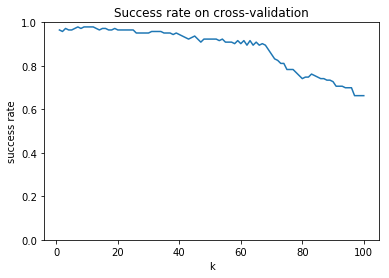

best_k: 7, predicted: 0.933333333333
FINISHED


In [6]:
KNN_RANGE = np.arange(1, 101, 1)
K = 10


data, classes = read_data_from_file("iris.data")

np.random.shuffle(data)
train_length = int(math.floor(len(data) * 0.9))
train_data = data[:train_length]
test_data = data[train_length:]

print "k-fold: "
best_k = k_fold(train_data, K, KNN_RANGE)

X_test = [x[0] for x in test_data]
Y_test = [x[1] for x in test_data]
loss = predict(train_data, X_test, Y_test, best_k)

print "best_k: {}, predicted: {}".format(best_k, 1 - loss)
print "FINISHED"

